In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import math

## Clinical analysis

In [2]:
# Assuming the CSV file is located in a folder named 'data' which is a subdirectory of the current directory
file_path = 'output_ClinicalData.csv'

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path, sep = ",", index_col = 0)
    print("CSV file successfully read.")  # Indicate successful reading
except FileNotFoundError:
    print("File not found. Please check the file path.")  # Handle file not found error

# Now you can use 'df' DataFrame for further analysis

CSV file successfully read.


In [3]:
df

,PFS_P,PFS_P_CNSR,TRT01P
ID,,,
X00936b9285d6b8665ae9122993fb8e91,4.172485,0,Avelumab+Axitinib
X105622fadc33f23755ac2df823110aca,16.591376,1,Sunitinib
Xe44f39747a8e84b02b4cb24659312144,11.104723,0,Sunitinib
X293dd1284496215e9a0eca9f17a98e7e,14.028747,1,Sunitinib
X01ed7190ce00862696edbf047b542045,12.418891,0,Sunitinib
...,...,...,...
X50772aa64efb859960b20f8801cd6f58,4.271047,0,Sunitinib
X91bcd3067a1a7954692d836515e04869,2.496920,0,Sunitinib
Xc7439a06ffa32b313b0ec1b987b992a2,6.505133,1,Avelumab+Axitinib


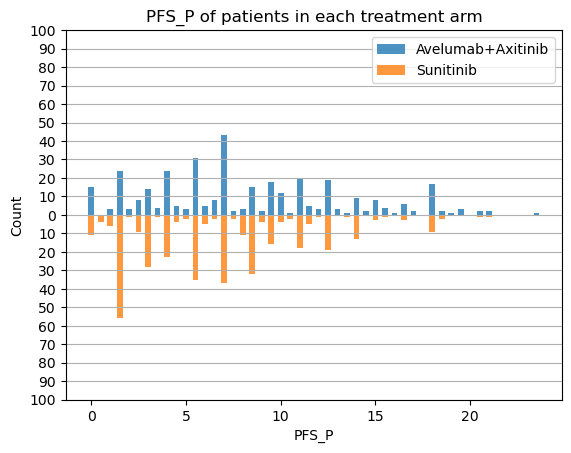

KeyError: 'AGE'

In [4]:
cohorts = [df[df['TRT01P'] == 'Avelumab+Axitinib'], 
           df[df['TRT01P'] == 'Sunitinib']]
names = ['Avelumab+Axitinib', 'Sunitinib']
biomarkers = ['PFS_P', 'AGE', 'SEX', 'PFS_P_CNSR', 'HE_TUMOR_CELL_CONTENT_IN_TUMOR_AREA', 'MATH',
              'PDL1FL', 'TCGA_cluster', 'CD8_POSITIVE_CELLS_TUMOR_CENTER',
              'PD-L1_TOTAL_IMMUNE_CELLS_PER_TUMOR_AREA',
              'CD8_POSITIVE_CELLS_TOTAL_AREA'
             ]

WIDTH = .3

for bio in biomarkers:
    maxCount = -1
    step = 1
    for idx, cohort_df in enumerate(cohorts):
        # round(x * 2) / 2 rounds to the nearest .5 => round(2.4 * 2) / 2 = round(4.8) / 2 = 5 / 2 = 2.5
        rounded_list = None

        nan_values = cohort_df[bio].isna().sum()
        
        values = cohort_df[bio].dropna().values
        if len(set(values)) > 10:
            rounded_list = pd.array([round(x * 2) / 2 for x in values])
        else:
            rounded_list = pd.array([x for x in values])
            
        counts = rounded_list.value_counts()
        
        keys = counts.keys()
        values = counts.values


        
        if (max(max(values),nan_values) > maxCount):
            maxCount = (max(max(values),nan_values) + 50) - (max(max(values),nan_values) % 50)
            
        if idx == 1:
            values = -values
        plt.bar(keys, values, alpha = .8, width = WIDTH, label = names[idx])
        
        # Plot gray bars for NaN values
        if nan_values > 0:
            plt.bar(-1, nan_values, alpha=.8, width= WIDTH, color='gray', label='NaN' if idx == 0 else '', bottom=-nan_values if idx == 0 else 0)

    if (maxCount > 100):
        step = 50
    else:
        step = 10
    
    plt.yticks(np.arange(-maxCount,maxCount+(step-1),step), abs(np.arange(-maxCount,maxCount+(step-1),step)))
    plt.title(bio + " of patients in each treatment arm")
    plt.xlabel(bio)
    plt.ylabel("Count")
    plt.grid(axis = 'y')
    plt.legend()
    plt.show()

In [ ]:
a = df['TCGA_cluster'].fillna(-1)
a[a == -1]

In [ ]:
set(df['TCGA_cluster'])

## Genetic analysis

In [2]:
# Assuming the CSV file is located in a folder named 'data' which is a subdirectory of the current directory
file_path = 'output_GeneticData.csv'

# Read the CSV file into a DataFrame
try:
    df_gen = pd.read_csv(file_path, sep = ",", index_col = 0)
    print("CSV file successfully read.")  # Indicate successful reading
except FileNotFoundError:
    print("File not found. Please check the file path.")  # Handle file not found error

# Now you can use 'df' DataFrame for further analysis

CSV file successfully read.


In [3]:
# Assuming the CSV file is located in a folder named 'data' which is a subdirectory of the current directory
file_path = 'output_ClinicalData.csv'

# Read the CSV file into a DataFrame
try:
    df_cli = pd.read_csv(file_path, sep = ",", index_col = 0)
    print("CSV file successfully read.")  # Indicate successful reading
except FileNotFoundError:
    print("File not found. Please check the file path.")  # Handle file not found error

# Now you can use 'df' DataFrame for further analysis

CSV file successfully read.


In [4]:
df_gen

,A4GALT,AAAS,AAMP,ABCA1,ABCA2,ABCB1,ABCB6,ABCG1,ABCG2,ABI1,...,ZMPSTE24,ZNF106,ZNF24,ZNF274,ZNF473,ZNF513,ZRANB1,ZRSR2,ZW10,ZWINT
EA595454,32.171969,34.242601,33.267249,35.857065,33.480007,33.657104,32.273746,33.339276,29.406782,34.258082,...,31.58994,34.69094,32.42176,31.47165,29.93693,33.17524,32.29895,33.28431,31.52522,30.86230
EA595455,32.641512,35.016935,34.419018,35.721381,34.107309,35.570497,33.680042,33.753294,30.356289,33.921299,...,33.70040,35.02163,32.29723,30.87511,30.87169,32.68092,31.86291,33.25893,31.39502,31.50998
EA595473,33.006150,34.260724,34.664401,34.695011,33.236821,34.777532,33.285852,33.303265,30.958198,33.686303,...,32.50897,34.41784,33.27688,31.10884,30.61398,32.79689,31.56140,32.57092,31.25099,30.02328
EA595500,32.052780,34.065914,32.341655,35.629469,34.030106,34.007788,31.869741,32.353024,29.206577,34.111344,...,32.26640,35.51778,32.61753,31.40478,31.23518,33.29764,32.54545,33.95532,32.52081,29.37345
EA595522,33.293074,34.574463,35.250248,35.647750,33.852364,35.094354,33.534954,33.873973,32.120649,34.175609,...,33.29881,34.71216,33.64956,32.28837,30.60883,32.39854,31.77382,32.55807,32.09846,31.00603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RCC_73_T_SCR,32.365074,34.742167,33.113039,33.747546,33.931629,33.838323,32.296025,31.642338,30.740420,33.402253,...,32.02075,34.82837,33.17326,31.86836,31.17820,33.59099,32.57067,33.63338,31.81453,30.78532
RCC_90_T_SCR,30.121368,33.792409,34.450999,34.371220,31.799811,31.895951,33.784466,31.870002,29.347511,34.507315,...,32.16958,33.61960,31.56047,31.59540,29.23127,32.77207,30.78896,31.31709,30.65842,31.50200
RCC_93_T_SCR,31.953984,34.146861,33.676334,35.386781,32.611501,33.842290,32.838072,32.987520,29.862937,33.772493,...,32.62316,35.20787,32.46942,31.20456,30.95466,32.07850,31.45327,34.13179,32.56414,30.91066
RCC_96_T_SCR,33.255145,35.138362,33.808583,36.072286,34.598098,34.715293,32.561403,33.959070,29.292590,33.498923,...,31.49508,34.76557,32.63131,32.87016,31.17809,33.03248,31.54103,33.80478,30.91711,28.76312


In [13]:
df_cli['PFS_P_CNSR'].value_counts()

PFS_P_CNSR
1    276
0     35
Name: count, dtype: int64

In [5]:
gene_vals = [x for X in df_gen.values for x in X]

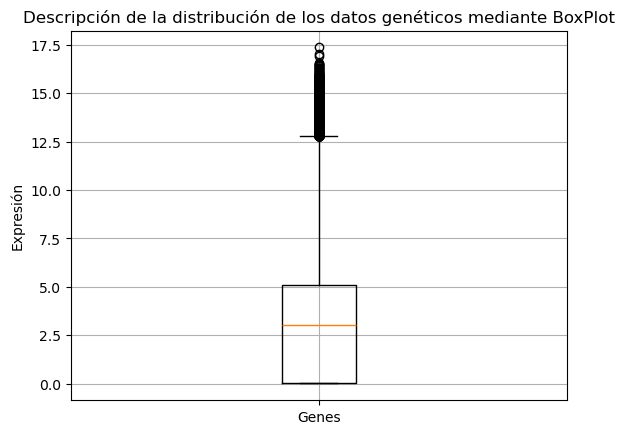

In [16]:
plt.boxplot(gene_vals)
plt.grid(True)
plt.xticks([1], labels=['Genes'])
plt.ylabel("Expresión")
plt.title("Descripción de la distribución de los datos genéticos mediante BoxPlot")
plt.show()

In [17]:
gene_vals = np.array(gene_vals)
mean_val = np.mean(gene_vals)

# Calculate standard deviation
std_val = np.std(gene_vals)

# Calculate median
median_val = np.median(gene_vals)

# Calculate minimum and maximum
min_val = np.min(gene_vals)
max_val = np.max(gene_vals)

# Print the results
print("Mean:", mean_val)
print("Standard Deviation:", std_val)
print("Median:", median_val)
print("Minimum:", min_val)
print("Maximum:", max_val)

Mean: 2.9811656060816065
Standard Deviation: 2.6330352019899554
Median: 3.01
Minimum: 0.01
Maximum: 17.36


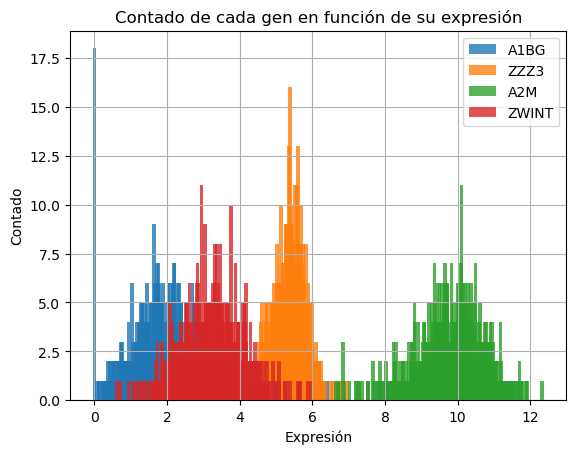

In [18]:
genes = ['A1BG', 'ZZZ3', 'A2M', 'ZWINT']

for gene in genes:
    vals = df_gen[gene].value_counts()
    keys = list(vals.keys())
    values = list(vals.values)
    plt.bar(keys,values,width = .1, label=gene, alpha = 0.8)
    plt.xlabel("Expresión")
    plt.ylabel("Contado")
    plt.title("Contado de cada gen en función de su expresión")
    plt.grid(True)
    plt.legend()

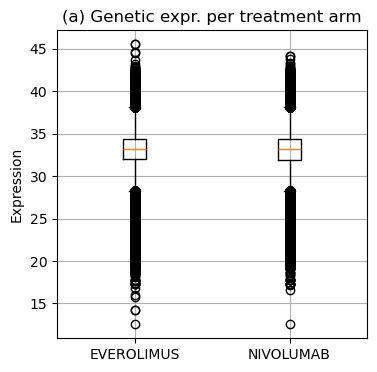

In [6]:
treatmentGroups = ['Avelumab+Axitinib', 'Sunitinib']
treatmentGroups = ['EVEROLIMUS', 'NIVOLUMAB']
plt.figure(figsize=(4,4))
for idx, tg in enumerate(treatmentGroups):
    treatment_indices = list(df_cli[df_cli['TRT01P'] == tg].index)
    x = df_gen.loc[treatment_indices].values.flatten()
    plt.boxplot(x, positions = [idx])
plt.grid(True)
plt.xticks([0, 1], labels=treatmentGroups)
plt.ylabel("Expression")
plt.title("(a) Genetic expr. per treatment arm", fontsize = 12)
plt.show()
    

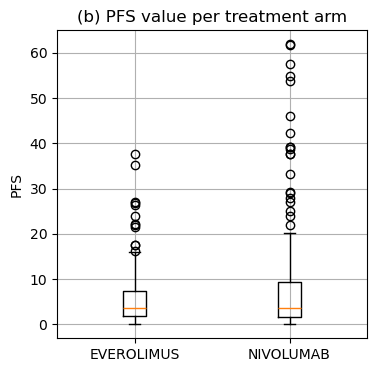

In [7]:
treatmentGroups = ['Avelumab+Axitinib', 'Sunitinib']
treatmentGroups = ['EVEROLIMUS', 'NIVOLUMAB']

plt.figure(figsize=(4,4))

for idx, tg in enumerate(treatmentGroups):
    treatment_indices = list(df_cli[df_cli['TRT01P'] == tg].index)
    x = df_cli.loc[treatment_indices]['PFS_P'].values.flatten()
    plt.boxplot(x, positions = [idx])
plt.grid(True)
plt.xticks([0, 1], labels=treatmentGroups)
plt.ylabel("PFS")
plt.title("(b) PFS value per treatment arm")
plt.show()
    

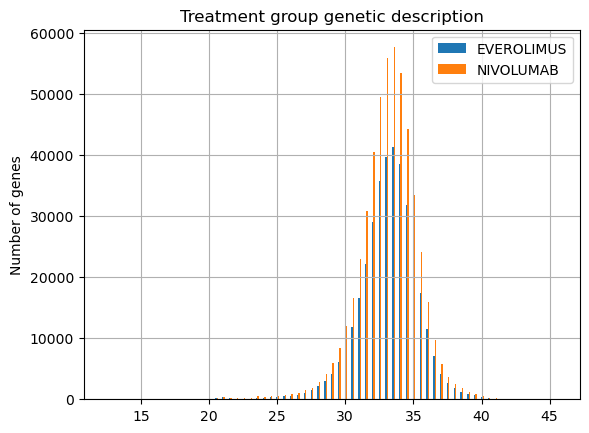

In [8]:
treatmentGroups = ['Avelumab+Axitinib', 'Sunitinib']
treatmentGroups = ['EVEROLIMUS', 'NIVOLUMAB']
offset = 0.1

for idx, tg in enumerate(treatmentGroups):
    treatment_indices = list(df_cli[df_cli['TRT01P'] == tg].index)
    vals = df_gen.loc[treatment_indices].values.flatten()
    vals = pd.array([round(x * 2) / 2 for x in vals]).value_counts()
    keys = np.array(vals.keys())
    values = list(vals.values)
    plt.bar(keys + offset * idx,values,width = .1, label=tg)
plt.grid(True)
plt.ylabel("Number of genes")
plt.title("Treatment group genetic description")
plt.legend()
plt.show()

In [90]:
treatment_indices = list(df_cli[df_cli['TRT01P'] == 'Avelumab+Axitinib'].index)
vals = df_gen.loc[treatment_indices]
vals

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
X00936b9285d6b8665ae9122993fb8e91,2.91,2.41,4.71,10.78,2.02,0.01,0.01,7.18,0.01,6.22,...,3.18,3.96,3.82,3.83,2.86,0.01,4.12,8.23,5.45,5.26
Xa57451efa2822becb256706fe939d078,2.26,2.21,1.53,9.77,1.86,0.01,1.25,6.16,0.01,6.61,...,3.31,2.95,4.11,3.80,3.06,1.49,4.20,8.26,5.83,5.36
Xff8fbe2fe76c82d429d4fa1d315f3b93,2.41,2.09,0.01,10.49,2.36,0.01,0.28,6.90,0.01,6.51,...,3.04,3.78,4.33,4.00,3.59,0.41,4.00,8.44,5.99,5.39
X83864118183d6d44a78a1dcfd50420de,1.13,0.41,2.09,9.45,0.97,0.01,0.01,6.77,0.01,6.27,...,1.95,2.25,3.91,3.94,3.85,1.67,4.04,8.38,5.22,5.08
X270eb069e858ab11185487082313a8ba,0.91,0.01,3.77,8.11,1.37,0.01,0.01,6.47,0.01,5.90,...,2.63,2.21,4.30,4.01,3.20,0.16,4.47,7.99,4.89,5.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xbc7a029dc7ce4b19a5a2b78a7b2fc6ae,1.29,0.01,3.32,9.15,1.40,0.01,0.29,7.16,0.01,6.24,...,1.61,2.54,3.43,3.25,2.97,2.54,3.67,8.25,4.96,4.50
X13b911b56a330efd2660b67b1cf98466,2.76,1.81,2.78,9.95,2.58,0.01,4.02,7.07,0.01,6.14,...,2.89,3.24,4.16,3.78,3.09,2.29,4.00,8.97,5.77,5.62
X9388bd484d0e404c6732573b4228d2a2,1.13,0.46,4.48,8.37,1.89,0.01,0.01,6.72,0.01,6.21,...,3.42,3.35,3.15,2.86,2.60,0.01,3.61,9.07,4.97,6.57
Xc7439a06ffa32b313b0ec1b987b992a2,1.74,0.56,1.20,8.96,0.64,0.01,0.01,5.98,0.01,6.16,...,3.01,3.77,4.44,4.30,2.92,0.21,4.34,7.93,5.10,5.02


In [139]:
df_cli[df_cli['TRT01P'] == 'Sunitinib']['PFS_P_CNSR'].value_counts()

PFS_P_CNSR
0    201
1    171
Name: count, dtype: int64

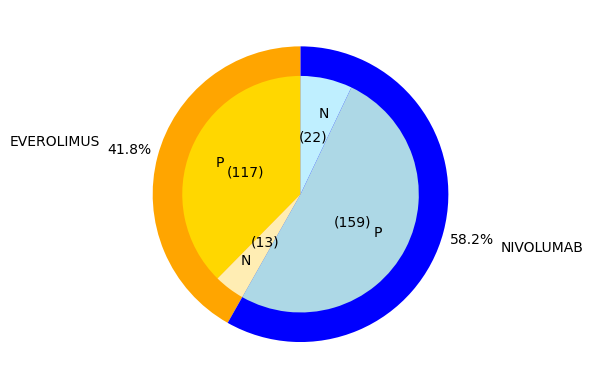

In [14]:
total_length = len(df_cli)
partial_length = -1

def absolute_value(val):
    absolute = np.round(val/100. * total_length, 0)
    return "({:d})".format(int(absolute))

treatmentGroups = ['Avelumab+Axitinib', 'Sunitinib']
treatmentGroups = ['EVEROLIMUS', 'NIVOLUMAB']
offset = 0.1
colors = ["#FFA500", "#0000FF", "#FFD700", "#FFEDB3", "#ADD8E6", "#BFEFFF"]

res_vals = {'Sizes' : [], 'Censor' : []}

for idx, tg in enumerate(treatmentGroups):
    censor_sizes = df_cli[df_cli['TRT01P'] == tg]['PFS_P_CNSR'].value_counts()
    res_vals['Sizes'] += [len(df_cli[df_cli['TRT01P'] == tg])]
    partial_length = len(df_cli[df_cli['TRT01P'] == tg])
    keys = censor_sizes.keys()
    vals = censor_sizes.values
    res_vals['Censor'].extend(vals)

plt.pie(np.array(res_vals['Sizes']), colors = colors[:2], labels = treatmentGroups, startangle = 90,  autopct='%1.1f%%', labeldistance = 1.4, pctdistance = 1.2)

plt.pie(np.array(res_vals['Censor']), colors = colors[2:], radius = 0.8,  autopct=absolute_value, labels = ['P', 'N'] * 2, startangle = 90, labeldistance=.7, pctdistance = 0.5)

plt.show()




In [21]:
from scipy.stats import f_oneway

performance1 = [
    0.519, 0.406, 0.606, 0.455, 0.534,
    0.487, 0.695, 0.493, 0.606, 0.636,
    0.608, 0.582, 0.607, 0.556, 0.504,
    0.481, 0.722, 0.530, 0.640, 0.573,
    0.445, 0.528, 0.563, 0.586, 0.512,
    0.548, 0.646, 0.539, 0.623, 0.644,
    0.575, 0.491, 0.578, 0.544, 0.499,
    0.394, 0.488, 0.435, 0.480, 0.392,
    0.551, 0.459, 0.656, 0.524, 0.435,
    0.495, 0.695, 0.453, 0.609, 0.723
]

performance2 = [
    0.513, 0.521, 0.602, 0.507, 0.561,
    0.495, 0.645, 0.521, 0.673, 0.696,
    0.478, 0.553, 0.597, 0.485, 0.525,
    0.453, 0.612, 0.428, 0.649, 0.758,
    0.537, 0.564, 0.605, 0.512, 0.454,
    0.498, 0.611, 0.505, 0.516, 0.718,
    0.627, 0.596, 0.465, 0.564, 0.398,
    0.577, 0.542, 0.512, 0.497, 0.444,
    0.500, 0.560, 0.459, 0.498, 0.550,
    0.446, 0.662, 0.490, 0.719, 0.704
]
 
# Conduct the one-way ANOVA
f_oneway(performance1, performance2)

F_onewayResult(statistic=0.08998153232005941, pvalue=0.7648359802510092)